### Import Liberaries

In [1]:
import numpy as np
import pandas as pd
import os
import random 
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
import cv2

### Read Images

In [2]:
#Paths

training_path_dogs='E:/Machine Learning/Machine Learning/Computer vision/Computer vision/Data set for dog and cat/training_set/training_set/dogs'
training_path_cats='E:/Machine Learning/Machine Learning/Computer vision/Computer vision/Data set for dog and cat/training_set/training_set/cats'

test_path_dogs='E:/Machine Learning/Machine Learning/Computer vision/Computer vision/Data set for dog and cat/test_set/test_set/dogs'
test_path_cats='E:/Machine Learning/Machine Learning/Computer vision/Computer vision/Data set for dog and cat/test_set/test_set/cats'

# get label Name   
def get_Label(number):
    labels = {0:'Cat', 1:'Dog'}
    return labels[number]



In [3]:
print(os.listdir(training_path_dogs))

['dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.1000.jpg', 'dog.1001.jpg', 'dog.1002.jpg', 'dog.1003.jpg', 'dog.1004.jpg', 'dog.1005.jpg', 'dog.1006.jpg', 'dog.1007.jpg', 'dog.1008.jpg', 'dog.1009.jpg', 'dog.101.jpg', 'dog.1010.jpg', 'dog.1011.jpg', 'dog.1012.jpg', 'dog.1013.jpg', 'dog.1014.jpg', 'dog.1015.jpg', 'dog.1016.jpg', 'dog.1017.jpg', 'dog.1018.jpg', 'dog.1019.jpg', 'dog.102.jpg', 'dog.1020.jpg', 'dog.1021.jpg', 'dog.1022.jpg', 'dog.1023.jpg', 'dog.1024.jpg', 'dog.1025.jpg', 'dog.1026.jpg', 'dog.1027.jpg', 'dog.1028.jpg', 'dog.1029.jpg', 'dog.103.jpg', 'dog.1030.jpg', 'dog.1031.jpg', 'dog.1032.jpg', 'dog.1033.jpg', 'dog.1034.jpg', 'dog.1035.jpg', 'dog.1036.jpg', 'dog.1037.jpg', 'dog.1038.jpg', 'dog.1039.jpg', 'dog.104.jpg', 'dog.1040.jpg', 'dog.1041.jpg', 'dog.1042.jpg', 'dog.1043.jpg', 'dog.1044.jpg', 'dog.1045.jpg', 'dog.1046.jpg', 'dog.1047.jpg', 'dog.1048.jpg', 'dog.1049.jpg', 'dog.105.jpg', 'dog.1050.jpg', 'dog.1051.jpg', 'dog.1052.jpg', 'dog.1053.jpg', 'dog.1054.jpg', 'd

In [4]:
def loadImages(path):
   # return array of images

    imagesList = os.listdir(path)
    loadedImages = []
    for image in imagesList:
        img = cv2.imread(path + image)
       # img = cv2.resize(image,(128,128))
        loadedImages.append(img)

    return loadedImages


In [5]:
DogImages= loadImages(training_path_dogs+'/')
CatesImages= loadImages(training_path_cats+'/')

In [6]:
print(len(DogImages),len(CatesImages))

4001 4001


In [7]:
# هنعمل label لكل صوره 
# ان هعمل لكل صوره لو هي قطه 0 لو هي كلب هتبقي 1 .. ان عملت اتنين كولوم واحد في الصوره وقدامه هو 0 ولا 1 

In [8]:
# concatenation using naive method
training_Images=[]
labels=[]
for i in range(len(DogImages)):
    training_Images.append(DogImages[i])
    training_Images.append(CatesImages[i])
    labels.append(0)
    labels.append(1)


In [9]:
# هشوف ال حجم دلوقتي هلاقيها اضعفت علشان العمودين الي انا عملاهم 

In [10]:
print(len(training_Images),len(labels))

8002 8002


In [11]:
training_Images[0].shape , training_Images[1].shape

((499, 327, 3), (280, 300, 3))

### VisualizeImages

In [12]:
# هيعرض 9 صوره وهتبقي 3*3 

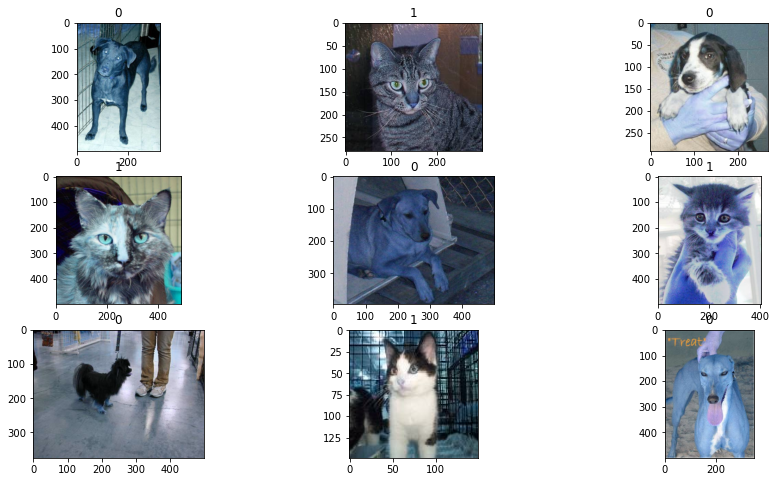

In [13]:
plt.figure(figsize=(15,8))
for i in range(9): # 9 صور 
    plt.subplot(3,3,i+1) # هيبقي 3 صفوف و 3 عواميد
    plt.imshow(training_Images[i])
    plt.title(labels[i])
plt.show()

## Data Augmentation 

Text(0.5, 1.0, 'translated Image')

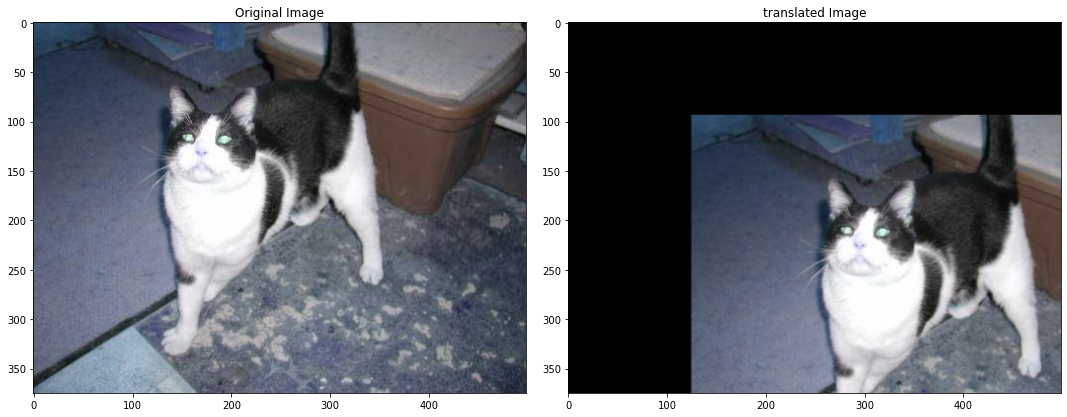

In [14]:
#translated image

def translation(image):
    height, width = image.shape[:2]
    quarter_height, quarter_width = height/4, width/4
    # T is our translation matrix
    T = np.float32([[1, 0, quarter_width], [0, 1,quarter_height]])
     #visualize  the agumenetd image
    img_translation = cv2.warpAffine(image, T, (width, height))

    return img_translation



image = training_Images[random.randint(0, 1000)]
original_image =image
translated_image = translation(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(translated_image)
axs[1].set_title('translated Image')




Text(0.5, 1.0, 'rotated_image Image')

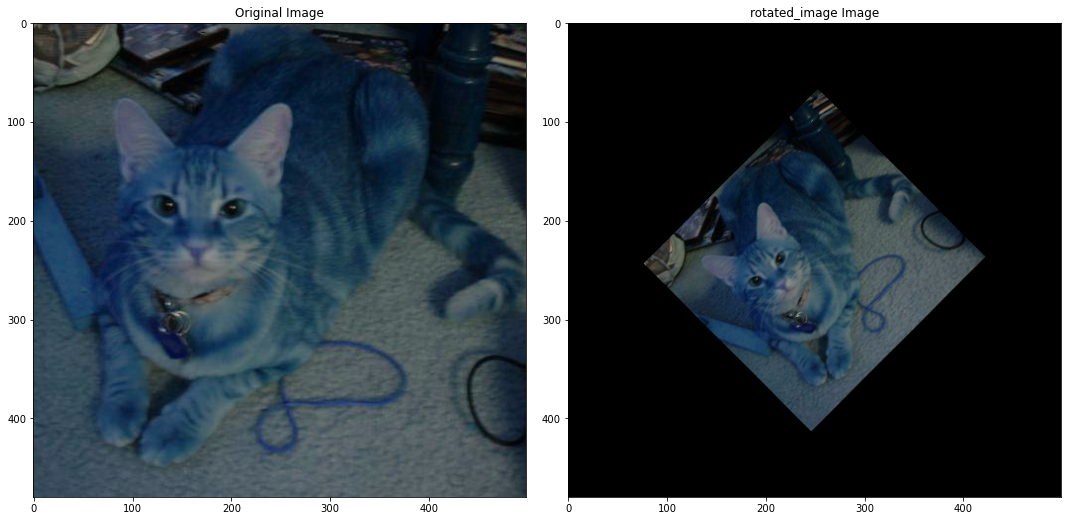

In [15]:
def rotation(image):
    height, width = image.shape[:2]

    # Divide by two to rototate the image around its centre
    rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 45, .5)

    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))

    return rotated_image



image = training_Images[random.randint(0, 1000)]
original_image =image
rotated_image = rotation(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(rotated_image)
axs[1].set_title('rotated_image Image')


Text(0.5, 1.0, 'flipped Image')

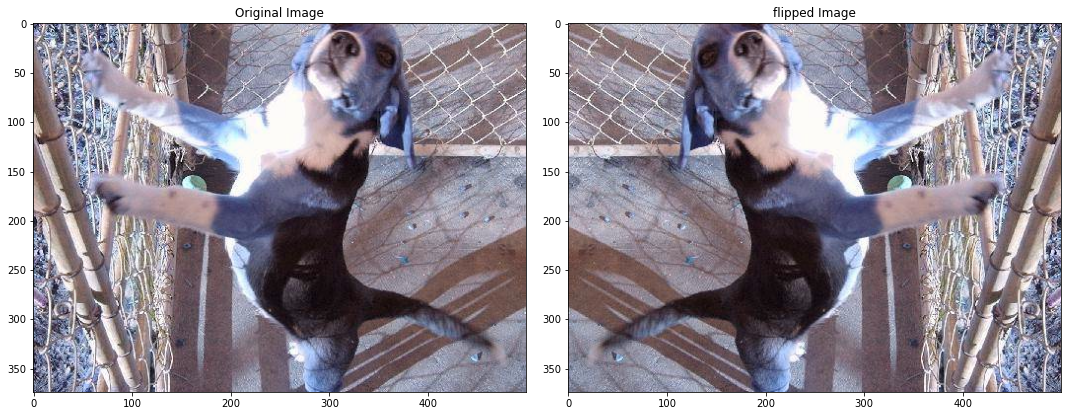

In [16]:
#flip image 

def flip(image):
    flipped = cv2.flip(image, 1) # 1 vertical & 0 Horizntal
    return flipped



original_image = training_Images[random.randint(0, 1000)]
flipped_image = flip(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(flipped_image)
axs[1].set_title('flipped Image')

In [17]:
#This meann each augmentation will occur  50% 

def agumented_image(image,label):
    if np.random.rand()<0.5:
        image=rotation(image)
    if np.random.rand()<0.5:
        image=translation(image)
    if np.random.rand()<0.5:
        image=flip(image)
        
    return image,label

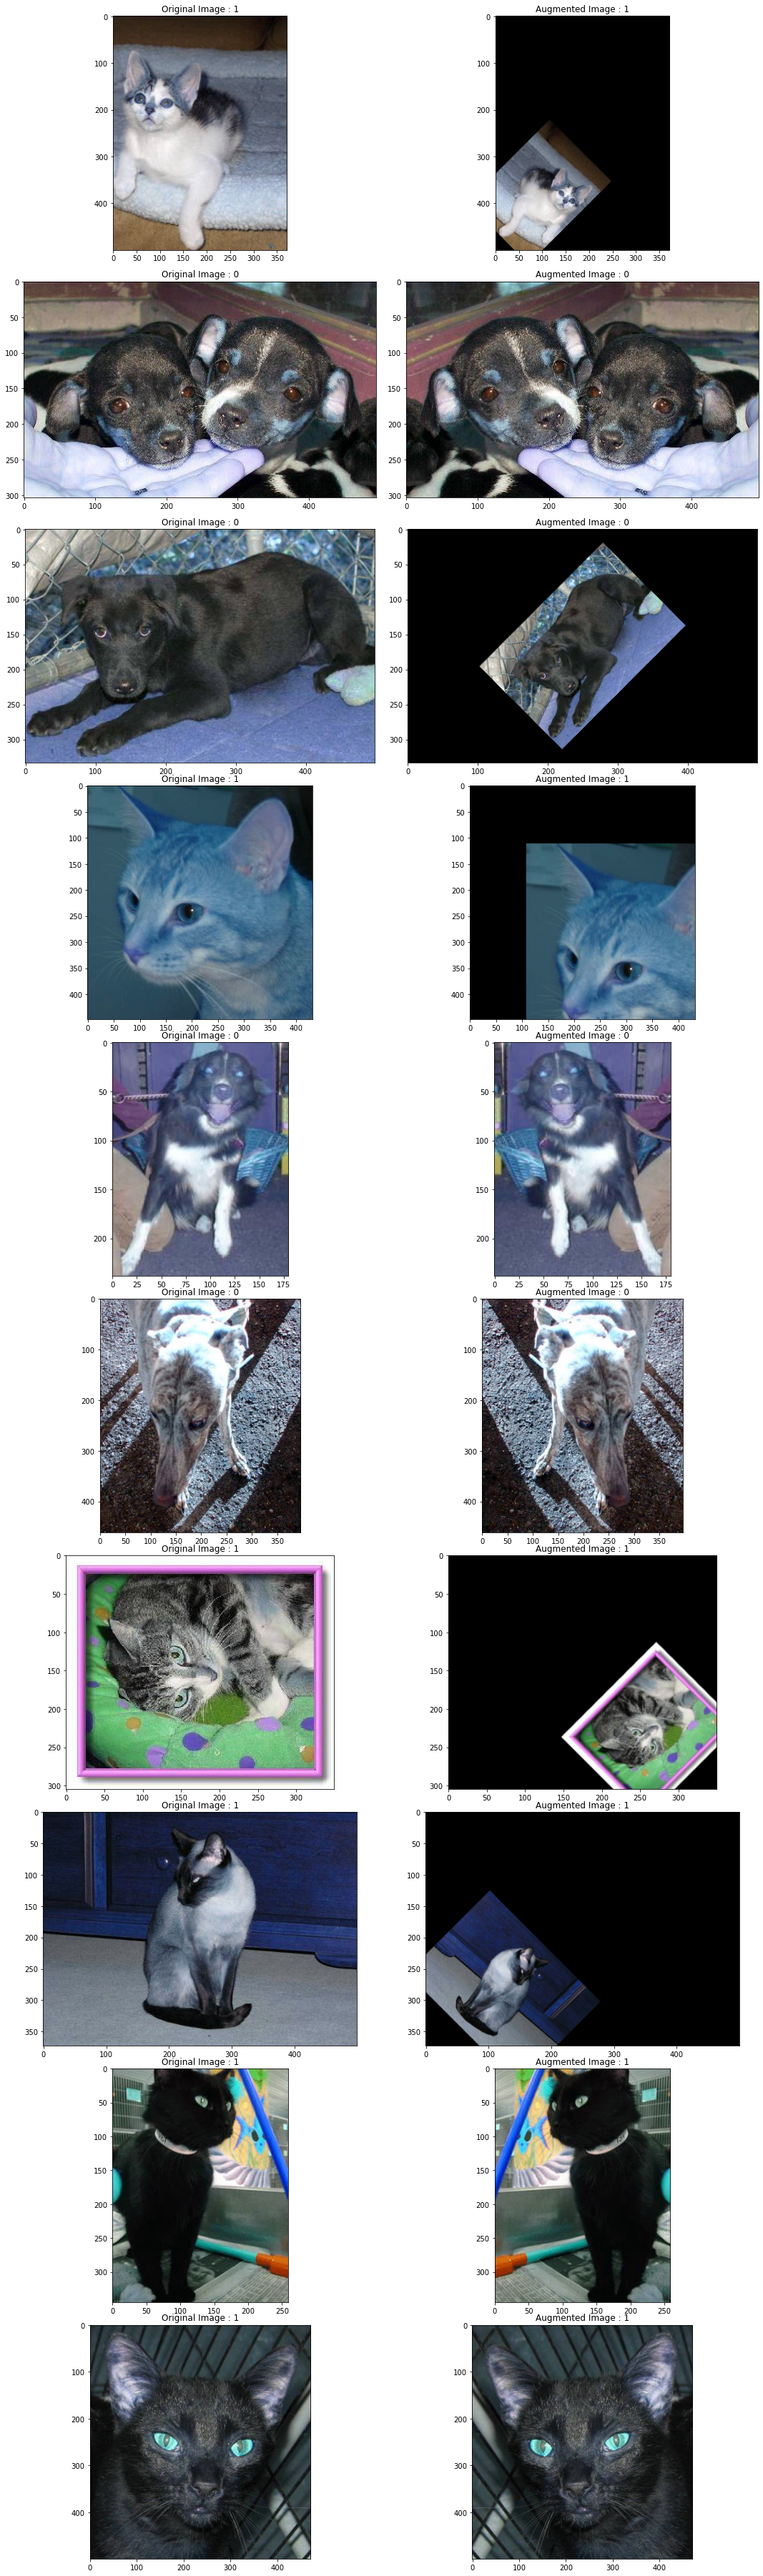

In [18]:
#visualize the agumented images 
ncol = 2
nrow = 10

fig, axs = plt.subplots(nrow, ncol, figsize=(15, 50))
fig.tight_layout()

for i in range(10):
    randnum = random.randint(0, len(training_Images) - 1)
    random_image = training_Images[randnum]
    
    original_image =random_image
    augmented_image, label = agumented_image(random_image,labels[randnum])
    
    axs[i][0].imshow(original_image)
    axs[i][0].set_title("Original Image : "+ str(label))
  
    axs[i][1].imshow(augmented_image)
    axs[i][1].set_title("Augmented Image : " +str(label ))

In [19]:
print(training_Images[0].shape,training_Images[1].shape)

(499, 327, 3) (280, 300, 3)


## Preprocessing

know mean size of image

In [32]:
dim1=[]
dim2=[]
for image in training_Images:
    d1,d2,colors=image.shape
    dim1.append(d1)
    dim2.append(d2)

AttributeError: 'NoneType' object has no attribute 'shape'

In [33]:
print(np.mean(dim1),np.mean(dim2))


360.47825 403.7935


In [34]:
image_shape=(350,350,3)


In [35]:
image=training_Images[0].astype(np.uint8)
image.shape

(499, 327, 3)

In [36]:
def img_preprocessing(image):
    image=np.asarray(image).astype('float32')
    #img=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    img=cv2.resize(image,(350,350))
    return img

In [46]:
#yield keyword still return disered output of batch_generator and also saved all initialize values inside the batch_generator 
def batch_generator (images,labels,batch_size,istraining):
    while True:
        batch_img = []
        batch_label = []
    
    for i in range(batch_size):
        random_index = random.randint(0, len(images) - 1)
      
    if istraining:
        image, label = agumented_image(images[random_index], labels[random_index])
     
    else:
        image = images[random_index]
        label = labels[random_index]
      
    im = img_preprocessing(image)
    batch_img.append(im)
    batch_label.append(label)
    yield (np.array(batch_img), np.array(batch_label)) 
      


### BuildModel

In [47]:

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dropout,Dense

In [48]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 348, 348, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 174, 174, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 172, 172, 32)      9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 86, 86, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 84, 84, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 42, 42, 64)      

In [49]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [50]:

batch_generator(training_Images, labels, 100, 1)

<generator object batch_generator at 0x00000189F5515C10>

In [ ]:
history = model.fit_generator(batch_generator(training_Images, labels, 20, 1),
                                  steps_per_epoch=300, 
                                  epochs=2,
                                  validation_data=batch_generator(training_Images, labels, 10, 0),
                                  validation_steps=200,
                                  verbose=1,
                                  shuffle = 1)

C:\Users\AMIT\AppData\Local\Temp/ipykernel_17092/1486735049.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(batch_generator(training_Images, labels, 20, 1),


In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','test'])
plt.title('Loss')
plt.xlabel('epochs')

# Keras Data Augmentation 

In [24]:
# example of horizontal shift image augmentation
from keras.preprocessing.image import ImageDataGenerator
# create image data augmentation generator
datagen = ImageDataGenerator( rotation_range=45, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.0, zoom_range=0.2,
    horizontal_flip=True, vertical_flip=True,
    validation_split=0.0,)


In [25]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 348, 348, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 174, 174, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 172, 172, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 86, 86, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 84, 84, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 42, 42, 64)       0

In [26]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [27]:
def img_preprocessing2(images):
    result=[]
    for image in images:
        image=np.asarray(image).astype('float32')
        #img=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
        img=cv2.resize(image,(350,350))
        result.append(img)
    return np.array(result)

train_x=img_preprocessing2(training_Images[:1000])
val_x=img_preprocessing2(training_Images[2000:2500])


In [36]:
val_y=np.array(labels[2000:2500])

In [39]:
history = model.fit_generator(datagen.flow(train_x, np.array(labels[:1000]), 10),
                                  steps_per_epoch=50, 
                                  epochs=10,
                                  validation_data=datagen.flow(val_x,val_y, batch_size=8),             
                                  verbose=1,
                                  shuffle = 1)

NameError: name 'datagen' is not defined

Text(0.5, 0, 'epochs')

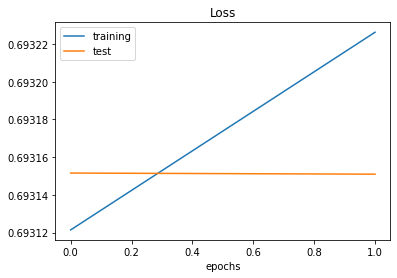

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','test'])
plt.title('Loss')
plt.xlabel('epochs')

In [ ]:
import tensorflow
img_t1=tensorflow.keras.preprocessing.image.img_to_array(training_Images[0])
img_t=np.expand_dims(img_t1,axis=0)
g=datagen.flow(img_t,batch_size=1)

In [ ]:
for i in range(10):
    image=g.next()
    plt.imshow(image[0].astype('uint8'))
 
    break
plt.show()

In [ ]:
datagen=ImageDataGenerator(zca_whitening=True)
g=datagen.flow(img_t,batch_size=1)
for i in range(10):
    image=g.next()
    plt.imshow(image[0].astype('uint8'))
 
    break
plt.show()